# Multiple_Linear_Regression_Bike_Sharing_Assignment

Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

Goal:

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

Step1: Importing Libraries

In [238]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [239]:
#Read the csv file
bikeSharing_df = pd.read_csv('day.csv')

In [240]:
bikeSharing_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [241]:
bikeSharing_df.shape

(730, 16)

In [242]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [243]:
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [244]:
bikeSharing_df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


# Cleaning Data
Drop columns that are not useful for analysis
- instant is just a row instance identifier.
- dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage

In [245]:
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [246]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [247]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [248]:
bikeSharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [249]:
bikeSharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [250]:
bikeSharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

# Handle Missing values

In [251]:
#Print null counts by column
bikeSharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Inference: There are no null values.

# Handle Outliers

In [252]:
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [253]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

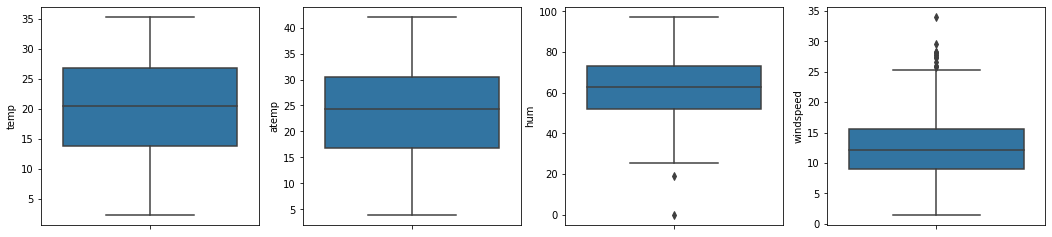

In [254]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

# EDA

In [255]:
# Convert month,season, weekday and weathersit to categorical types
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1080x2160 with 0 Axes>

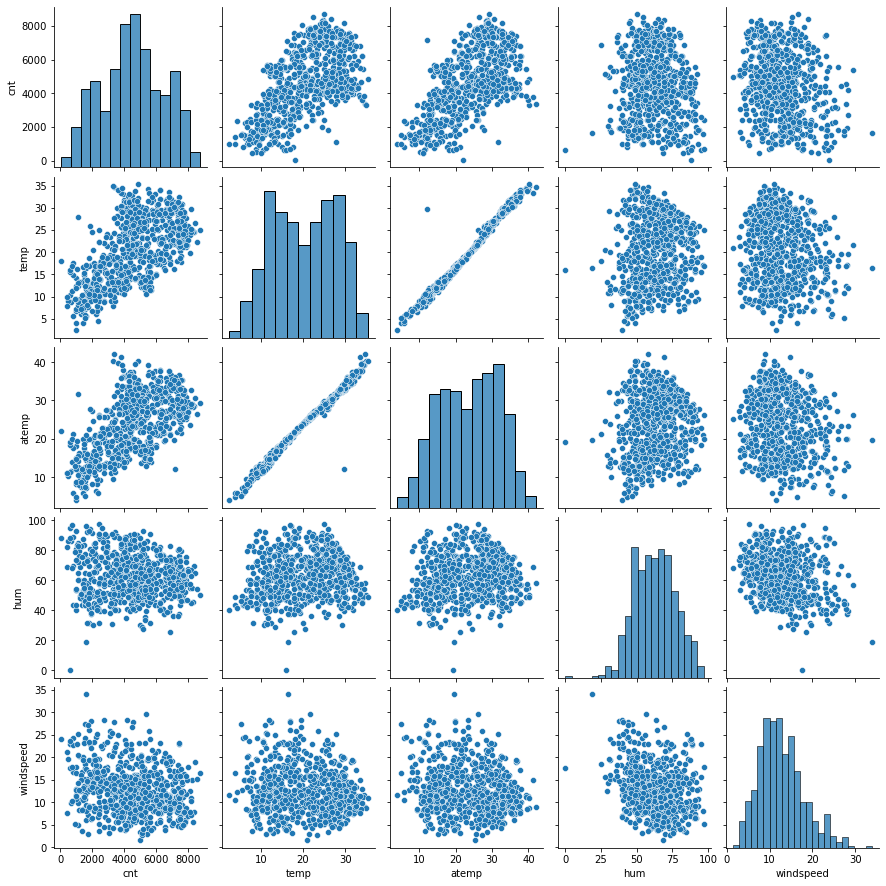

In [256]:
# Draw pair Plots to check the linear relationship
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

# inference 
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other

<Figure size 1440x1080 with 0 Axes>

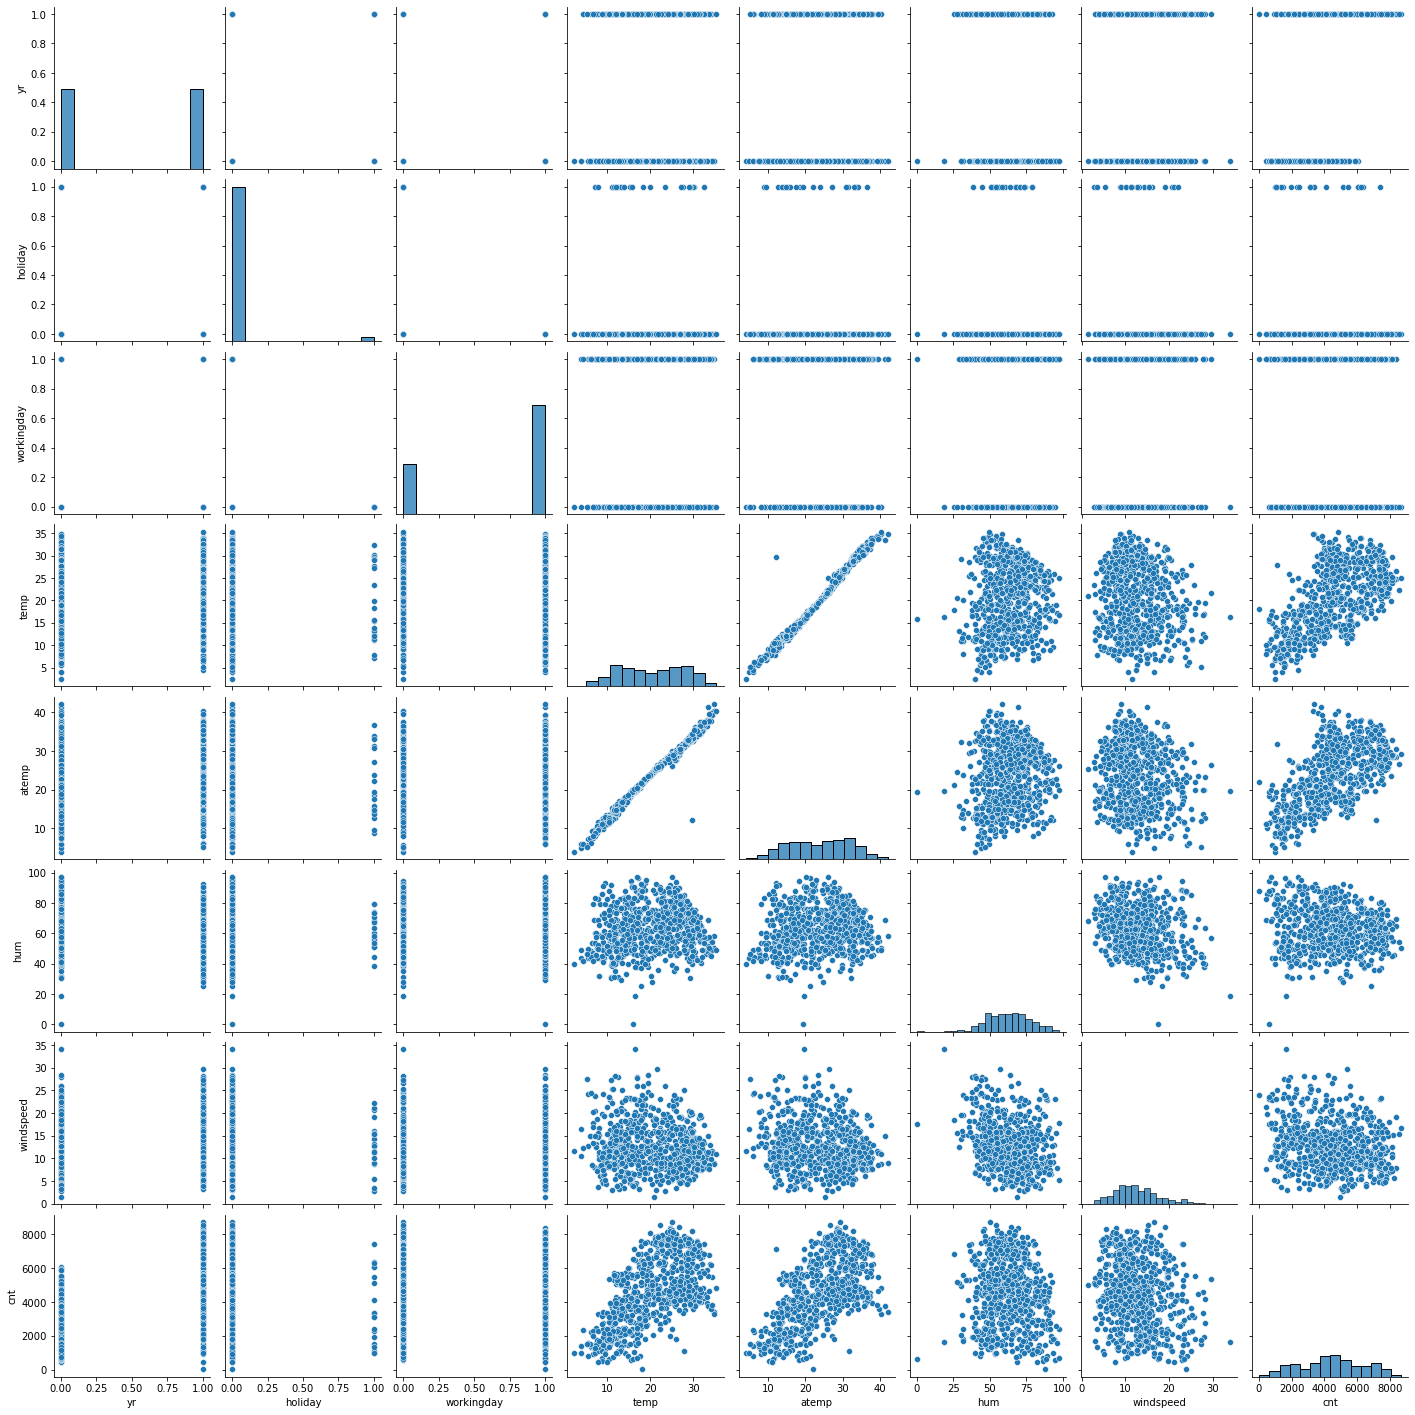

In [257]:
# Visualising the Data to Find the Correlation between the Numerical Variable

plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_df)
plt.show()


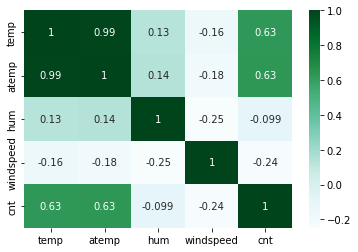

In [258]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

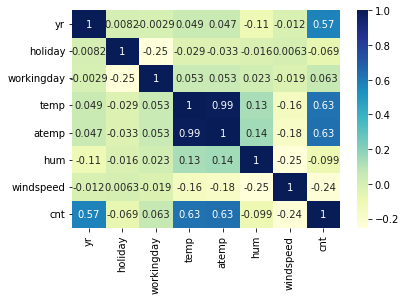

In [259]:
#Correlations for numeric variables
cor=bikeSharing_df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

From the correlation map, temp and atemp seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

# Analysing Categorical Variables with target variables

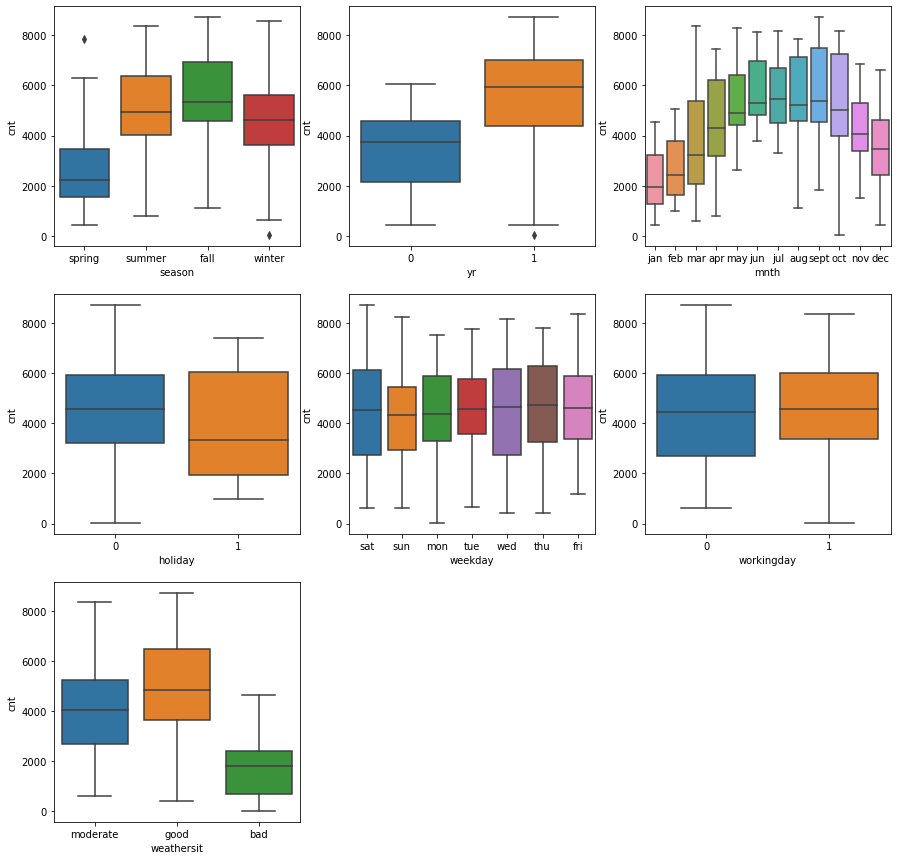

In [260]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

Inference:
Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. Demand for next year (2019) has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture about demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extreme weather conditions

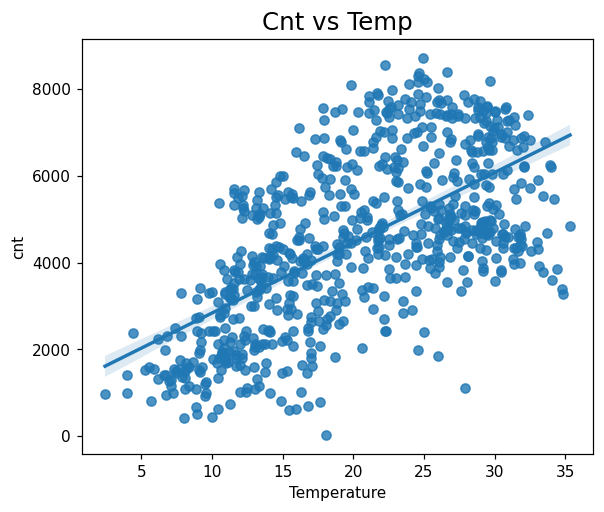

In [261]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Inference:
Demand for bikes is positively correlated to temp.
We can see that cnt is linearly increasing with temp indicating linear relation.

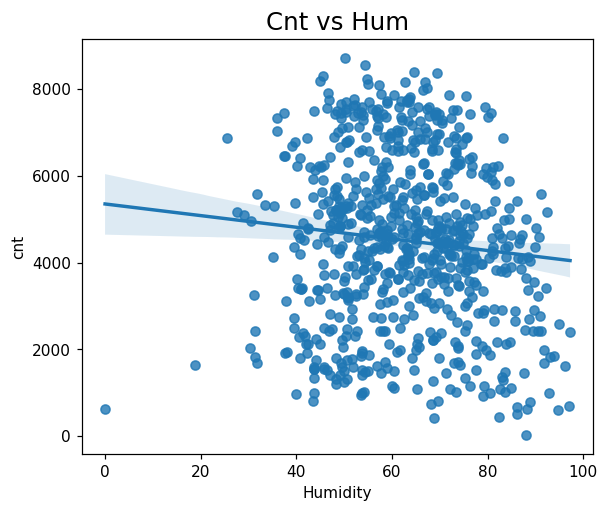

In [262]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

Inference:
Hum is values are more scattered around.
Although we can see cnt decreasing with increase in humidity.

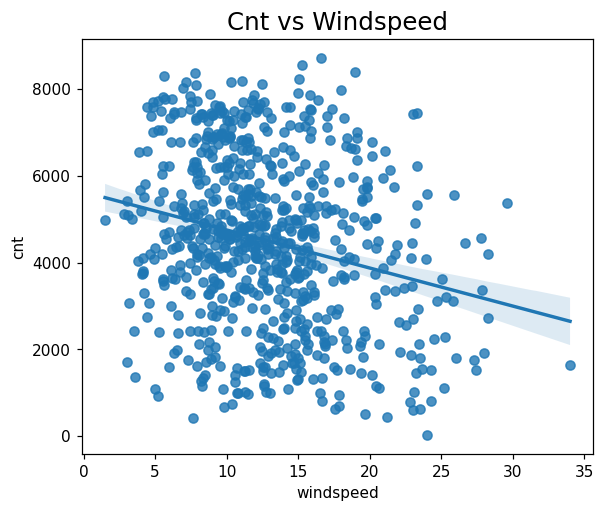

In [263]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

Inference:
Windspeed is values are more scattered around.
Although we can see cnt decreasing with increase in windspeed.

# Data Preparation for Linear Regression

In [264]:
# Create dummy variables for all categorical variables
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])

In [265]:
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In [266]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

# Model Building

    # Split Data into training and test

In [267]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test = train_test_split(bikeSharing_df, train_size=0.7, test_size=0.3, random_state=100)

In [268]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.04230,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,6664,0,1,...,0,1,0,0,0,0,0,0,0,1
578,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,0,...,0,0,0,0,1,0,0,0,1,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,1,0,...,0,0,0,0,0,0,1,0,1,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,0,...,0,0,1,0,0,0,0,0,0,1


# Feature Scaling continuous variables


In [269]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [270]:
# To make all features in same scale to interpret easily

# Following columns are continous to be scaled temp,hum,windspeed

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

X_train[var] = scaler.fit_transform(X_train[var])

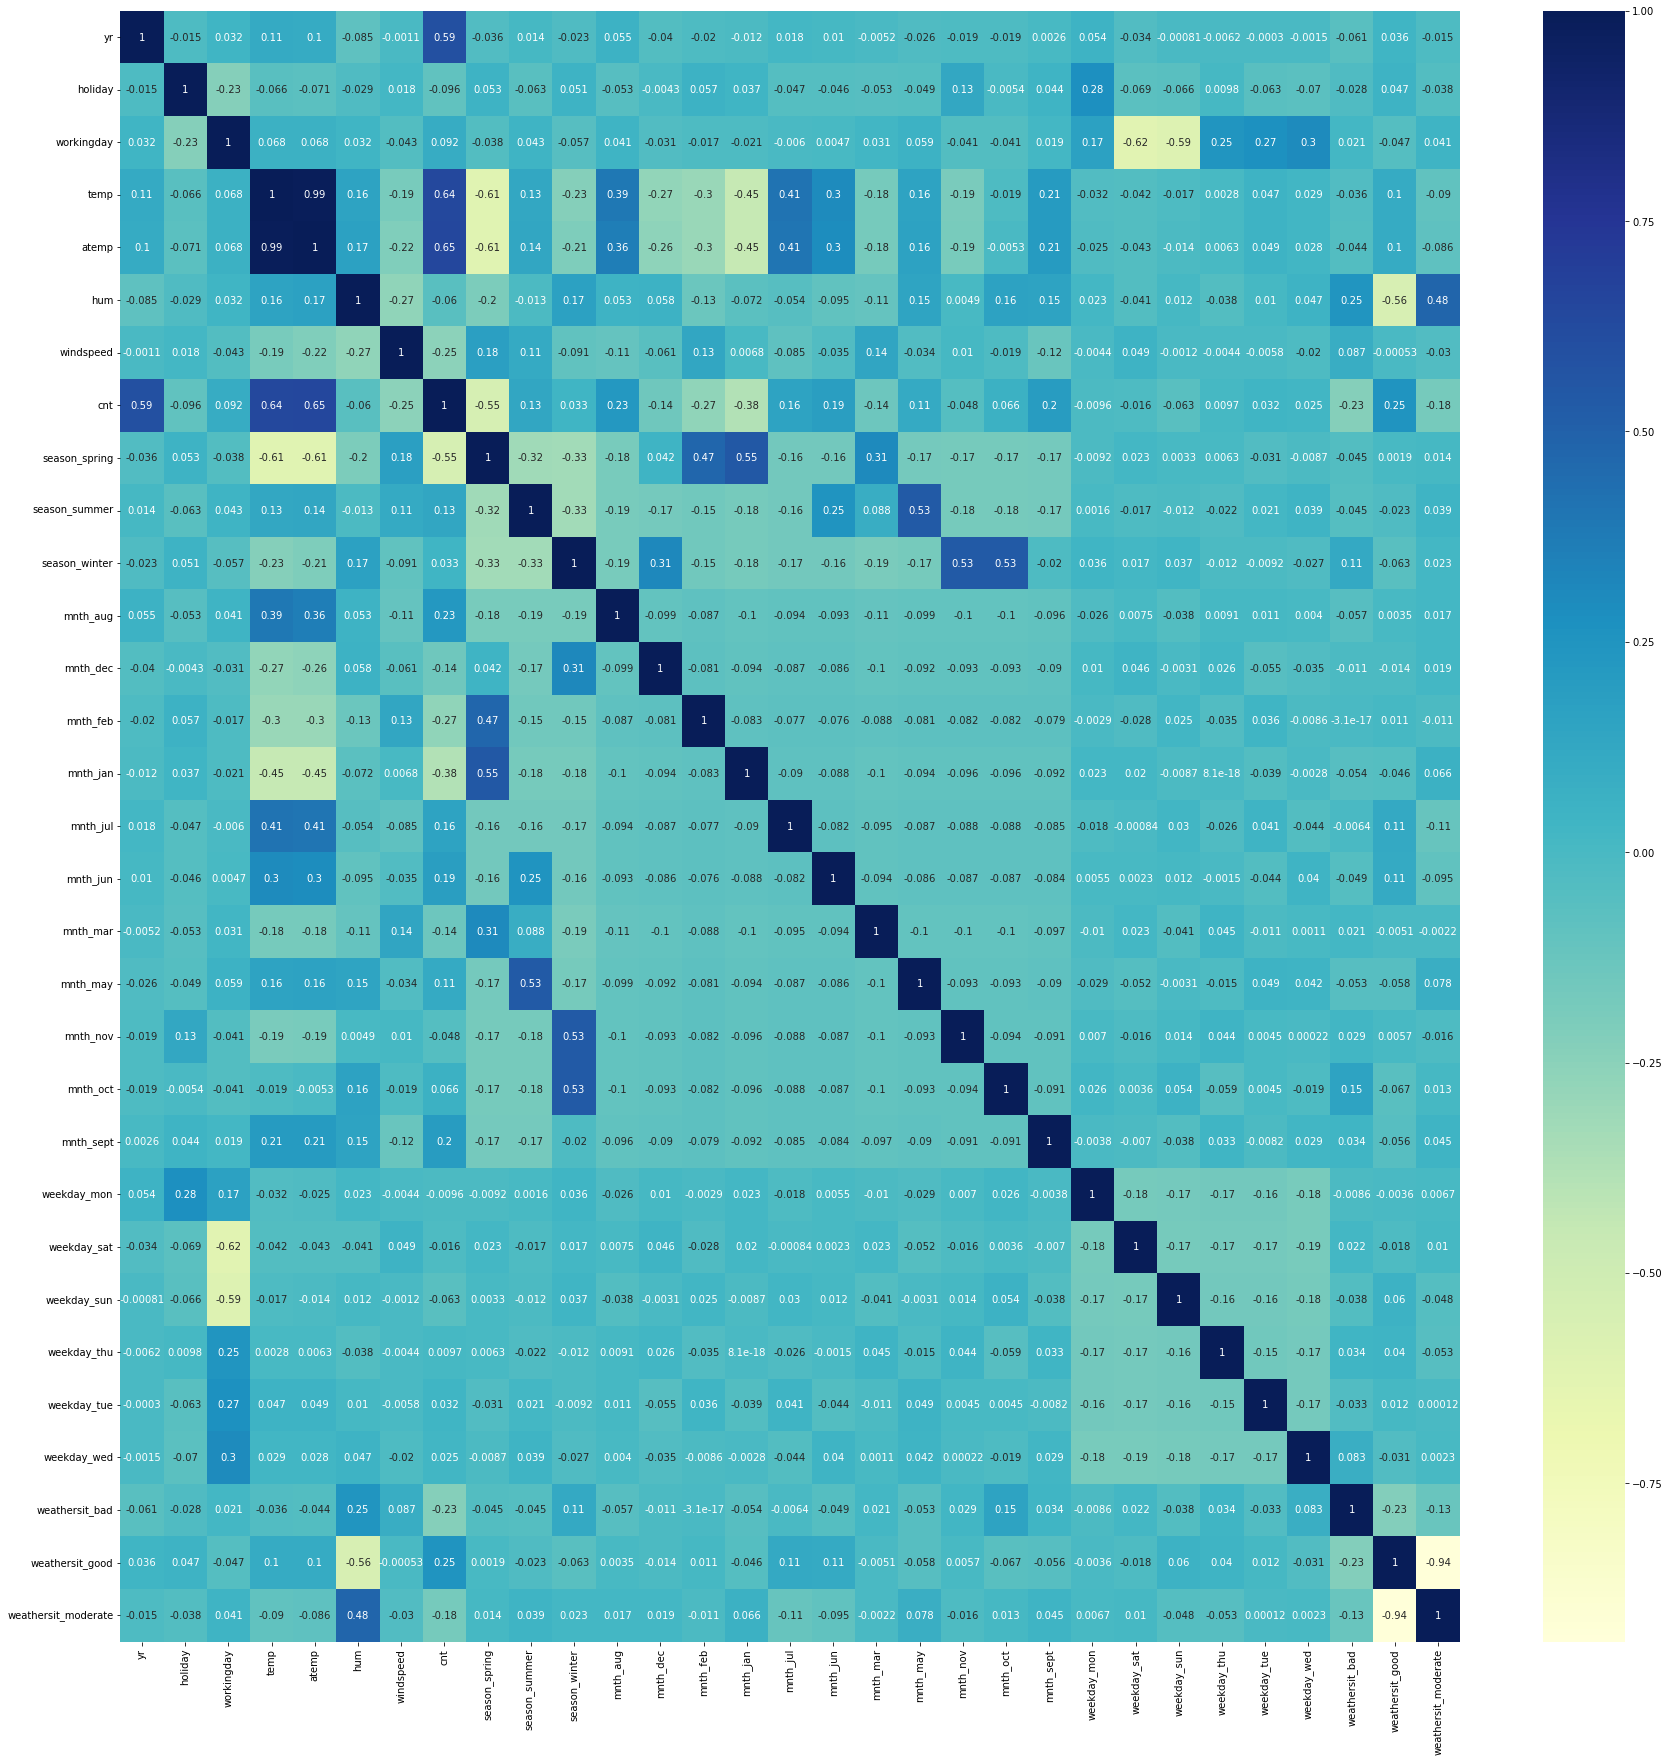

In [271]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, temp seems to the correlated to cnt the most

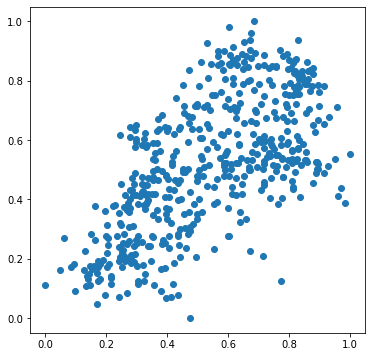

In [272]:
plt.figure(figsize=[6,6])
plt.scatter(X_train.temp, X_train.cnt)
plt.show()

In [273]:
# Dividing into X and Y sets for the model building
y_train = X_train.pop('cnt')

# Build a Model using RFE and Automated approach
Use RFE to eliminate some columns

In [274]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [275]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [276]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

# Manual elimination


In [277]:
# Columns selected by RFE. We will start with these columns for manual elimination
col1=X_train.columns[rfe.support_]

In [278]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [279]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[col1]

In [280]:
X_train_rfe.shape

(510, 15)

# Build Model
Model 1 - Start with all variables selected by RFE

In [281]:
#Selected columns for Model 1 - all columns selected by RFE


X_train_sm = sm.add_constant(X_train_rfe[col1])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.13e-191
Time:                        20:23:20   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1035      0.030      3.492      0.001       0.045       0.162
yr                      0.2297      0.008     28.660      0.000       0.214       0.245
holiday                -0.0594      0.027     -2.206      0.028      -0.112      -0.006
workingday              0.0432      0.012      3.744      0.000       0.021       0.066
temp                    0.5278      0.033     15.897      0.000       0.463       0.593
hum                    -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed              -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring          -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer           0.0526      0.015      3.553      0.000       0.024       0.082
season_winter           0.1003      0.017      5.890      0.000       0.067       0.134
mnth_jul               -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_sept               0.0818      0.016      4.956      0.000       0.049       0.114
weekday_sat             0.0532      0.015      3.661      0.000       0.025       0.082
weathersit_bad         -0.1104      0.022     -4.965      0.000      -0.154      -0.067
weathersit_good         0.1359      0.010     13.123      0.000       0.116       0.156
weathersit_moderate     0.0780      0.013      6.238      0.000       0.053       0.103
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     1.53e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.22e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This model has an Adjusted R-squared value of 84.3% which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

In [282]:
df1 = X_train_rfe[col1]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

               Features    VIF
13      weathersit_good  51.67
14  weathersit_moderate  34.17
6         season_spring   5.02
12       weathersit_bad   4.41
3                  temp   3.62
8         season_winter   3.49
7         season_summer   2.61
4                   hum   1.91
2            workingday   1.88
11          weekday_sat   1.78
9              mnth_jul   1.49
10            mnth_sept   1.30
5             windspeed   1.20
1               holiday   1.16
0                    yr   1.03


From the model summary above, few variables which have VIF > 5, dropping weathersit_good  & weathersit_moderate  


In [283]:
X_train_rfe.drop(['weathersit_moderate'], axis = 1, inplace = True)
X_train_rfe.drop(['weathersit_good'], axis = 1, inplace = True)

In [284]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm2 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.38e-186
Time:                        20:23:20   Log-Likelihood:                 502.42
No. Observations:                 510   AIC:                            -976.8
Df Residuals:                     496   BIC:                            -917.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2820      0.036      7.

In [285]:
X_train_rfe.drop(['const'], axis = 1, inplace = True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

          Features    VIF
4              hum  19.51
3             temp  14.39
2       workingday   5.28
5        windspeed   4.69
6    season_spring   3.92
8    season_winter   3.18
7    season_summer   2.77
0               yr   2.08
11     weekday_sat   1.97
9         mnth_jul   1.58
10       mnth_sept   1.39
1          holiday   1.17
12  weathersit_bad   1.13


VIF: temp is having high VIF (14.39), but during EDA we could see temp has a high correlation with cnt and also its a important varible based on business understanding. We could found hum has highest VIF (19.51) & workingday VIF (5.28) which is > 0.5. We will drop the variable and update the model.

In [286]:
X_train_rfe.drop(['hum'], axis = 1, inplace = True)

X_train_rfe.drop(['workingday'], axis = 1, inplace = True)


In [287]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm3 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.28e-170
Time:                        20:23:20   Log-Likelihood:                 459.57
No. Observations:                 510   AIC:                            -895.1
Df Residuals:                     498   BIC:                            -844.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1509      0.032      4.

In [288]:
c = X_train_rfe.drop(['const'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

          Features   VIF
2             temp  5.00
3        windspeed  4.62
5    season_summer  2.17
0               yr  2.07
4    season_spring  2.02
6    season_winter  1.74
7         mnth_jul  1.58
8        mnth_sept  1.33
9      weekday_sat  1.19
10  weathersit_bad  1.06
1          holiday  1.05


P value for weekday_sat >0.05 , will drop this variable and rebuild the model

In [289]:
X_train_rfe.drop(['weekday_sat'], axis = 1, inplace = True)

In [290]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm3 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.89e-171
Time:                        20:23:20   Log-Likelihood:                 458.33
No. Observations:                 510   AIC:                            -894.7
Df Residuals:                     499   BIC:                            -848.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1543      0.032      4.

In [291]:
k = X_train_rfe.drop(['const'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = k.columns
vif['VIF'] = [variance_inflation_factor(k.values, i) for i in range(k.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

         Features   VIF
2            temp  4.97
3       windspeed  4.60
5   season_summer  2.17
0              yr  2.07
4   season_spring  2.00
6   season_winter  1.72
7        mnth_jul  1.58
8       mnth_sept  1.32
9  weathersit_bad  1.06
1         holiday  1.04


All the VIF values and p-values seem to be in the permissible range now. Also the Adjusted R-squared value has dropped to just 80.3% using 10 variables. This model is explaining most of the variance without being too complex. So let's proceed with this model.

# Residual Analysis
Before we make predictions on the test set, let's first analyse the residuals.

In [292]:
y_train_cnt = lm3.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

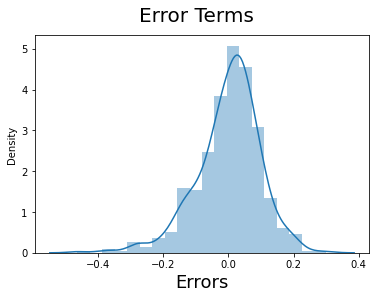

In [293]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

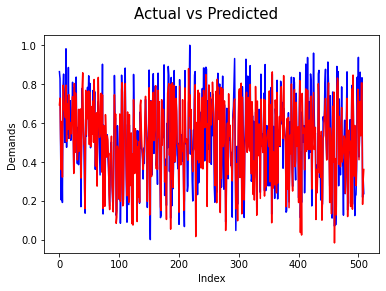

In [294]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_cnt, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok

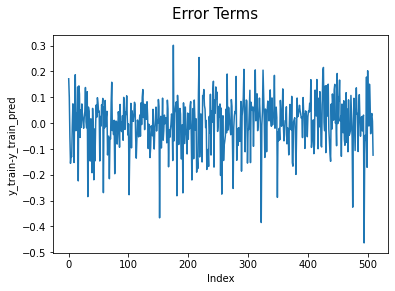

In [295]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_cnt)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here,If we see the error terms are independent of each other.

In [296]:
#Print R-squared Value
r2_score(y_train,y_train_cnt)

0.8072499306657421

Inference
R2 Same as we obtained for our final model

# Linearity Check

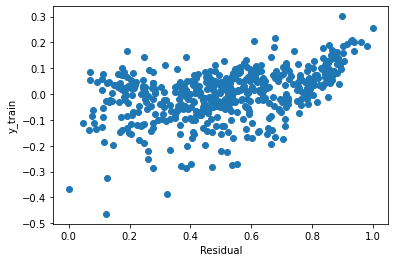

In [297]:
# scatter plot for the check
residual = (y_train - y_train_cnt)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

# Making Predictions
We would first need to scale the test set as well. So let's start with that.

In [298]:
X_train_rfe

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sept,weathersit_bad
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,1,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,0


In [299]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'cnt']

In [300]:
X_test[var] = scaler.transform(X_test[var])

In [301]:
# Split the 'df_test' set into X and y after scaling
y_test = X_test.pop('cnt')

In [302]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,0.511964,22.85230,0.837699,0.334206,0,0,1,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,0.817246,32.19710,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [303]:
# Let's check the list 'col2' which had the variables RFE had selected
col2=k.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_bad'],
      dtype='object')

In [304]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe = X_test[col2]

In [305]:
# Add a constant to the test set created
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   holiday         219 non-null    int64  
 3   temp            219 non-null    float64
 4   windspeed       219 non-null    float64
 5   season_spring   219 non-null    uint8  
 6   season_summer   219 non-null    uint8  
 7   season_winter   219 non-null    uint8  
 8   mnth_jul        219 non-null    uint8  
 9   mnth_sept       219 non-null    uint8  
 10  weathersit_bad  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [306]:
# Making predictions
y_pred = lm3.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

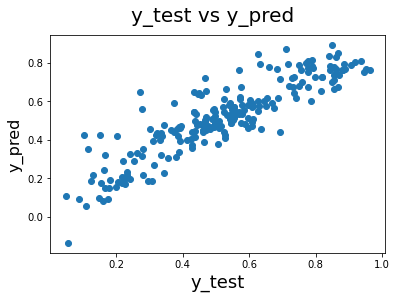

In [307]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [308]:
# r2_score for all variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.784963294348872

the r-squared on training and test data is about 80.7% and 78.5% respectively

In [309]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_bad']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.89e-171
Time:                        20:23:21   Log-Likelihood:                 458.33
No. Observations:                 510   AIC:                            -894.7
Df Residuals:                     499   BIC:                            -848.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1543      0.032      4.

# Analysing the above model, the comapany should focus on the following features:

Company should focus on expanding business during Spring.

Company should focus on expanding business during September.

Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.

There would be less bookings during Light Snow or Rain, they could probably use this time to survive the bikes without having business impact.

Demand for bikes is positively correlated to temp, days having low temperature  bike business drop & with increase in temperature to moderete business increases

Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

Significant variables to predict the demand for shared bikes

temp

holiday

windspeed

All Seasons

months( July, September)

Year (2019)

weathersit( Light Snow, Mist + Cloudy)
